Nama :Angelina Nirmala PUteri Dika Praktiko

NPM  :24083010055

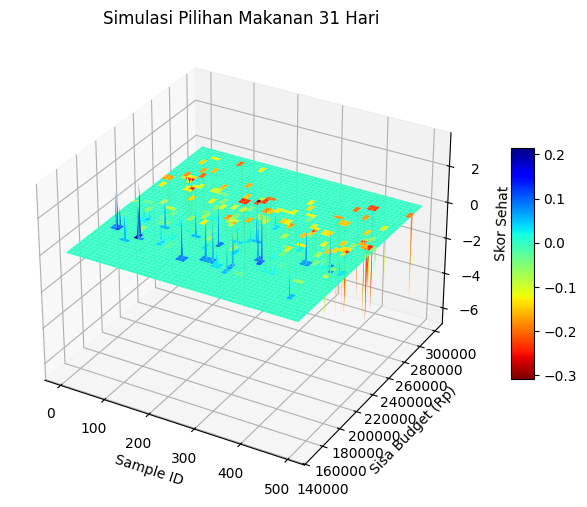

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Persiapan Data ---
NPM = 10055
np.random.seed(NPM)

# Baca CSV dengan pemisah ';'
makan = pd.read_csv("/content/makanan..csv", sep=";")

# Pastikan nama kolom bersih (hapus spasi, lowercase semua)
makan.columns = makan.columns.str.strip().str.lower()

# Convert 'harga' column to numeric, handling potential errors
makan['harga'] = makan['harga'].str.replace(',', '.').str.replace('E+04', 'e4').astype(float)


budget_awal = 1e6  # rupiah

# Bobot dasar
wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9  # simpangan lebih besar
wbosan_base = 0.2

SAMPLE_NUM = 500
sampleid = np.arange(SAMPLE_NUM)

# Array hasil simulasi
skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)  # 31 hari × 2 makan

# Batas sisa budget
SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)

# --- Simulasi ---
for n in range(SAMPLE_NUM):
    budget = budget_awal
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(31):  # 31 hari
        # --- makan pertama ---
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan["kenyang"][pilihan]
            + w_rasa * makan["rasa"][pilihan]
            + w_sehat * makan["sehat"][pilihan]
            - w_bosan * makan["bosan"][pilihan]
        )
        skor_sehat += makan["sehat"][pilihan] - 0.5
        budget -= makan["harga"][pilihan]
        resp_pilih[n][2 * i] = pilihan

        # --- makan kedua ---
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base + 0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base * 2, scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan["kenyang"][pilihan]
            + w_rasa * makan["rasa"][pilihan]
            + w_sehat * makan["sehat"][pilihan]
            - w_bosan * makan["bosan"][pilihan]
        )
        skor_sehat += makan["sehat"][pilihan] - 0.5
        budget -= makan["harga"][pilihan]
        resp_pilih[n][2 * i + 1] = pilihan

    # Simpan hasil simulasi
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    idx = int((budget - SISA_MININUM) / 1000)
    if 0 <= idx < len(bin_sisa):
        resp_sehat[n][idx] = skor_sehat

# --- Visualisasi ---
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection="3d")
Y, X = np.meshgrid(bin_sisa, sampleid)

surf = ax.plot_surface(X, Y, resp_sehat, cmap="jet_r", edgecolor="none")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax.set_title("Simulasi Pilihan Makanan 31 Hari")
ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Budget (Rp)")
ax.set_zlabel("Skor Sehat")

plt.show()

TUGAS:

(1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif

(2) cari titik-titik dengan sisa uang bulanan positif dari (1)

(3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif

(4) tampikan jadwal makanan sesuai pilihan (resp_pilih)

#(1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif

In [ ]:
makan

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,5000.0


In [ ]:
# Cari kombinasi 2 makanan saja
pola_positif = []
for combo in combinations(makanan_dict.keys(), 2):
    total_sehat = sum(makanan_dict[m] for m in combo)
    if total_sehat > 0:
        pola_positif.append({"pola": ", ".join(combo), "total_sehat": total_sehat})

# Hasil ke DataFrame
hasil = pd.DataFrame(pola_positif)

# Atur supaya semua baris & kolom ditampilkan
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# Tampilkan hasil lengkap
print("Kombinasi 2 makanan dengan nilai kumulatif kesehatan positif:")
print(hasil)

Kombinasi 2 makanan dengan nilai kumulatif kesehatan positif:
                      pola  total_sehat
0   ayamgeprek, nasipadang          1.3
1      ayamgeprek, mieayam          1.1
2        ayamgeprek, bakso          0.8
3       ayamgeprek, cireng          0.9
4   ayamgeprek, nasigoreng          1.2
5       ayamgeprek, seblak          0.7
6     ayamgeprek, gorengan          0.7
7       ayamgeprek, capcay          1.4
8    ayamgeprek, mi instan          0.6
9         ayamgeprek, roti          0.8
10  ayamgeprek, nasi telur          0.9
11      ayamgeprek, warteg          1.3
12     nasipadang, mieayam          1.4
13       nasipadang, bakso          1.1
14      nasipadang, cireng          1.2
15  nasipadang, nasigoreng          1.5
16      nasipadang, seblak          1.0
17    nasipadang, gorengan          1.0
18      nasipadang, capcay          1.7
19   nasipadang, mi instan          0.9
20        nasipadang, roti          1.1
21  nasipadang, nasi telur          1.2
22      nasipadang

Kombinasi dua makanan menunjukkan bahwa hidangan yang kurang sehat bisa tetap positif jika dipadukan dengan makanan seimbang. Capcay berperan penting sebagai penyeimbang, sehingga nasi padang, nasi goreng, atau mie ayam tetap sehat bila digabungkan dengannya. Sebaliknya, makanan ringan seperti gorengan, seblak, atau mi instan cenderung memberi skor rendah jika dipadukan sesama. Kunci pola makan sehat adalah mengombinasikan makanan berat dengan sayuran agar gizi lebih seimbang

In [ ]:
from itertools import combinations
import pandas as pd

# --- Buat kombinasi 2 makanan ---
pola_positif = []
for combo in combinations(makanan_dict.keys(), 2):
    total_sehat = sum(makanan_dict[m] for m in combo)
    if total_sehat > 0:
        pola_positif.append({"pola": ", ".join(combo), "total_sehat": total_sehat})

# Hasil ke DataFrame
hasil = pd.DataFrame(pola_positif)

# Urutkan dari nilai sehat tertinggi
hasil_sorted = hasil.sort_values(by="total_sehat", ascending=False)

# Ambil top 10
top10 = hasil_sorted.head(10)

print("Top 10 Pola makan dengan nilai kumulatif kesehatan tertinggi:")
print(top10.to_string(index=False))


Top 10 Pola makan dengan nilai kumulatif kesehatan tertinggi:
                  pola  total_sehat
        capcay, warteg          1.7
    nasipadang, capcay          1.7
    nasipadang, warteg          1.6
    nasigoreng, capcay          1.6
    nasigoreng, warteg          1.5
       mieayam, capcay          1.5
nasipadang, nasigoreng          1.5
       mieayam, warteg          1.4
   nasipadang, mieayam          1.4
    ayamgeprek, capcay          1.4


Hasil analisis menunjukkan kombinasi dengan capcay dan warteg menghasilkan nilai kesehatan tertinggi. Artinya, menambahkan sayuran ke makanan berat seperti nasi padang, nasi goreng, atau mie ayam dapat meningkatkan pola makan yang lebih sehat.

#(2) cari titik-titik dengan sisa uang bulanan positif dari (1)

In [ ]:
# Top 10 pola makan dari hasil sebelumnya
top10_pola = [
    "capcay, warteg",
    "nasipadang, capcay",
    "nasipadang, warteg",
    "nasigoreng, capcay",
    "nasigoreng, warteg",
    "mieayam, capcay",
    "nasipadang, nasigoreng",
    "mieayam, warteg",
    "nasipadang, mieayam",
    "ayamgeprek, capcay"
]

budget = 1_000_000
pola_bulanan = []

for p in top10_pola:
    makanan_list = p.split(", ")
    total_harga = sum(makanan_harga[m] for m in makanan_list)
    total_bulanan = total_harga * 30
    sisa_uang = budget - total_bulanan

    pola_bulanan.append({
        "pola": p,
        "total_harga_harian": total_harga,
        "total_bulanan": total_bulanan,
        "sisa_uang": sisa_uang
    })

hasil_bulanan = pd.DataFrame(pola_bulanan)

# Filter hanya yang sisa_uang positif
hasil_positif = hasil_bulanan[hasil_bulanan["sisa_uang"] > 0]

print("Pola makan dengan sisa uang bulanan positif (budget Rp1.000.000/30 hari):")
print(hasil_positif.to_string(index=False))


Pola makan dengan sisa uang bulanan positif (budget Rp1.000.000/30 hari):
                  pola  total_harga_harian  total_bulanan  sisa_uang
        capcay, warteg             33000.0       990000.0    10000.0
    nasipadang, capcay             32000.0       960000.0    40000.0
    nasigoreng, capcay             29000.0       870000.0   130000.0
    nasigoreng, warteg             32000.0       960000.0    40000.0
       mieayam, capcay             25000.0       750000.0   250000.0
nasipadang, nasigoreng             31000.0       930000.0    70000.0
       mieayam, warteg             28000.0       840000.0   160000.0
   nasipadang, mieayam             27000.0       810000.0   190000.0
    ayamgeprek, capcay             30000.0       900000.0   100000.0


Dengan anggaran Rp1.000.000 per bulan, pola makan yang paling hemat sekaligus sehat adalah mie ayam + capcay (Rp750.000, sisa Rp250.000). Alternatif lain yang juga baik yaitu nasi padang + mie ayam (Rp810.000, sisa Rp190.000). Sedangkan capcay + warteg paling mendekati batas anggaran (Rp990.000, sisa Rp10.000). Pilihan terbaik jatuh pada mie ayam + capcay karena ekonomis dan bergizi.

#(3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif

In [ ]:
makan

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,5000.0


In [ ]:
import pandas as pd
from itertools import combinations

# --- 1. Baca data ---
df = pd.read_csv("makanan..csv", sep=";")

# Pastikan kolom numerik
for col in ["sehat", "kenyang", "rasa", "bosan", "harga"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# --- 2. Cari kombinasi makanan ---
pola = []
min_makanan = 2   # minimal jumlah makanan dalam pola
max_makanan = 2   # maksimal jumlah makanan (ubah sesuai kebutuhan)

for r in range(min_makanan, max_makanan + 1):
    for combo in combinations(df.itertuples(index=False), r):
        total_sehat = sum(item.sehat for item in combo)
        total_kenyang = sum(item.kenyang for item in combo)
        total_rasa = sum(item.rasa for item in combo)
        total_bosan = sum(item.bosan for item in combo)
        total_harga = sum(item.harga for item in combo)

        # Gunakan bobot agar harga tidak mendominasi
        total_skor = total_sehat + total_kenyang + total_rasa - total_bosan - total_harga / 1000

        if total_sehat > 0:  # syarat kesehatan positif
            pola.append({
                "pola": [item.makanan for item in combo],
                "total_sehat": total_sehat,
                "total_skor": total_skor
            })

# --- 3. Ambil titik terbaik ---
hasil = pd.DataFrame(pola)

if not hasil.empty:
    titik_terbaik = hasil.loc[hasil["total_skor"].idxmax()].to_dict()
    print("Titik dengan Skor Kumulatif Terbesar (sehat positif):")
    print("Pola:", titik_terbaik["pola"])
    print("Total Sehat:", titik_terbaik["total_sehat"])
    print("Total Skor:", titik_terbaik["total_skor"])
else:
    print("Tidak ada kombinasi dengan nilai sehat positif.")


Titik dengan Skor Kumulatif Terbesar (sehat positif):
Pola: ['nasipadang', 'mieayam']
Total Sehat: 1.4
Total Skor: 4.4


Titik dengan skor kumulatif terbesar menunjukkan bahwa kombinasi nasi padang dan mie ayam memiliki keseimbangan paling baik. Nilai total sehat 1.4 menandakan bahwa meskipun keduanya termasuk makanan berat, kombinasi ini masih cukup seimbang. Sementara itu, total skor 4.4 memperlihatkan bahwa kombinasi ini unggul dibandingkan pola makan lainnya, sehingga bisa dianggap sebagai pilihan paling optimal dari segi kesehatan kumulatif.


#(4) tampikan jadwal makanan sesuai pilihan (resp_pilih)

In [ ]:
makan

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,5000.0


In [ ]:
import random
import pandas as pd

# --- Definisi makanan ---
makanan_sehat = ["capcay", "nasipadang", "nasigoreng", "mieayam", "warteg"]
makanan_biasa = ["ayamgeprek", "bakso", "cireng", "seblak", "gorengan", "mie instan", "roti", "nasi telur"]

# --- Buat jadwal ---
jadwal = []
for hari in range(1, 31):  # 30 hari
    harian = []
    for makan in range(2):  # 2 kali sehari
        # probabilitas 70% sehat, 30% biasa
        if random.random() < 0.7:
            menu = random.choice(makanan_sehat)
        else:
            menu = random.choice(makanan_biasa)
        harian.append(menu)
    jadwal.append({"Hari": hari, "Makan Siang": harian[0], "Makan Malam": harian[1]})

# --- Jadi DataFrame biar rapi ---
df_jadwal = pd.DataFrame(jadwal)
print(df_jadwal)

# --- Simpan ke CSV (opsional) ---
df_jadwal.to_csv("jadwal_makan.csv", index=False)


    Hari Makan Siang Makan Malam
0      1  nasigoreng     mieayam
1      2      warteg      capcay
2      3     mieayam      warteg
3      4  nasipadang      capcay
4      5  nasipadang  nasipadang
5      6      capcay  mie instan
6      7      warteg      capcay
7      8  ayamgeprek  nasi telur
8      9      seblak      seblak
9     10      warteg      capcay
10    11  nasipadang      warteg
11    12     mieayam      capcay
12    13      warteg      warteg
13    14     mieayam      cireng
14    15  nasipadang       bakso
15    16      seblak  nasigoreng
16    17    gorengan     mieayam
17    18  mie instan      cireng
18    19      seblak  nasipadang
19    20  mie instan      cireng
20    21      cireng      capcay
21    22      capcay      capcay
22    23  ayamgeprek    gorengan
23    24  nasigoreng      warteg
24    25      capcay      warteg
25    26     mieayam  mie instan
26    27    gorengan     mieayam
27    28      warteg     mieayam
28    29      warteg  nasigoreng
29    30  